In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('/Users/choejong-gyu/Documents/06.머신러닝/train.csv')

In [3]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True) # 평균
titanic_df['Cabin'].fillna('N',inplace=True) # N
titanic_df['Embarked'].fillna('N',inplace=True) # N


# sum을 한번쓰면 각 열에 대한 null의 개수를 구하는 것이고
# sum을 두번쓰면 쓰면 전체 데이터프레임에서의 null값의 총 개수를 계산
print('데이터 세트 Null값 갯수',titanic_df.isnull().sum())





데이터 세트 Null값 갯수 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [7]:
print('Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n')
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts()) # 선실
print('\n')
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts()) # 승선한 항구명

Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64



 Cabin 값 분포 :
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64



 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [8]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [9]:
titanic_df['Cabin'].value_counts()

Cabin
N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [10]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
null_check = titanic_df.isnull()
null_check

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
titanic_df.shape

(891, 12)

In [13]:
# survieved pclass sex age sibsp parch fare 

In [14]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

# Sex와 Survived를 그룹바이를 하고 survived열의 값들의 개수를 세는 코드
# 1이 생존 0은 생존X

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

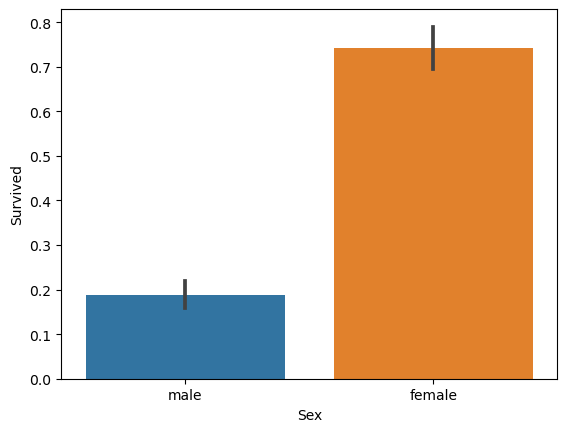

In [15]:
sns.barplot(x='Sex',y='Survived',data=titanic_df) # 전체중에 생존의 퍼센트

# 성별에 따른 생존

In [16]:
titanic_df.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [17]:
titanic_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

<Axes: xlabel='Pclass', ylabel='Survived'>

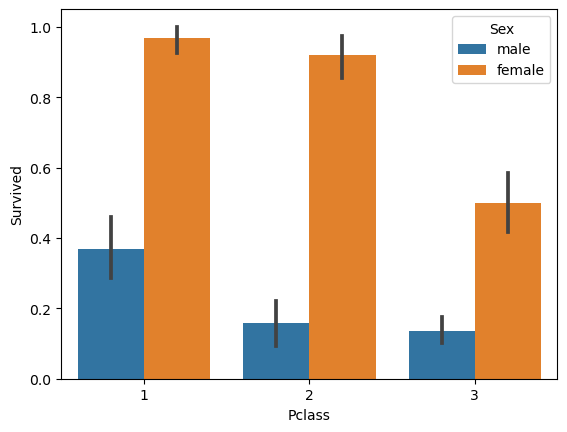

In [18]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

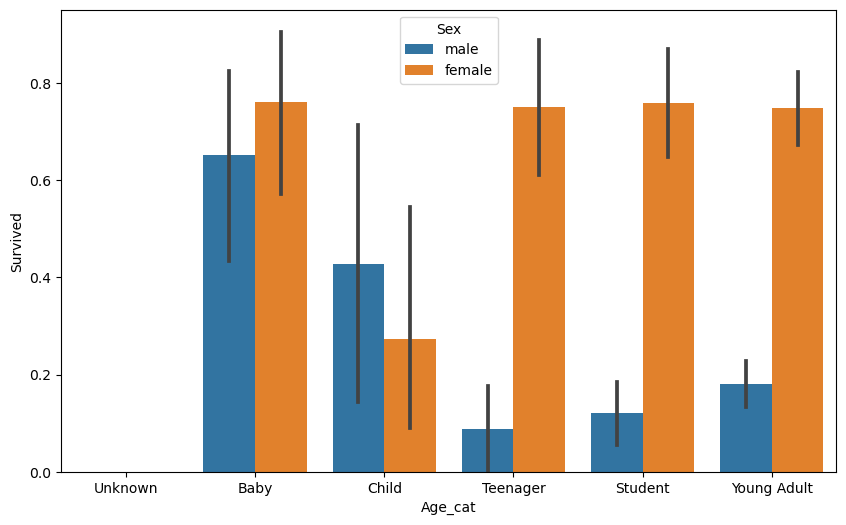

In [19]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <=5: cat = 'Baby'
    elif age <=12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat



titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

plt.figure(figsize=(10,6))
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult',]
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat', axis=1,inplace=True)

In [20]:
# 피처 엔코딩 : label encoding : n개의 범주형 데이터를 0부터 n-1까지의 연속적 수치 데이터로 표현하는 것
from sklearn import preprocessing

def encode_featrues(dataDF):
    features = ['Cabin','Sex','Embarked']
    
    for feature in features:  
        
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature].astype(str))

        # 변환된 데이터 출력
        dataDF[feature] = le.transform(dataDF[feature].astype(str))
        
    return dataDF


titanic_df = encode_featrues(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [21]:
from sklearn.preprocessing import LabelEncoder

# null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True) # 평균
    df['Cabin'].fillna('N',inplace=True) # N
    df['Embarked'].fillna('N',inplace=True) # N
    df['Fare'].fillna(0,inplace=True)
    return df


# 머신러닝 알고리즘에 불필요한 'PassengerId','Name','Ticket' 제거

def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df



# 레이블 인코딩 수행 (범주형 피처들이 레이블 인코딩 되는 것)
def format_featrues(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    
    for feature in features:                # 레이블 인코딩
        le = LabelEncoder()
        le = le.fit(df[feature])

        # 변환된 데이터 출력
        df[feature] = le.transform(df[feature])
        
    return df



# data Preprocessing 함수 호출
# 위에서 정의한 세가지 함수를 차례로 호출하여 데이터 전처리를 수행
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_featrues(df)
    return df

In [22]:
titanic_df = pd.read_csv('/Users/choejong-gyu/Documents/06.머신러닝/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.2,random_state=11)

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



# 결정트리, random forest, 로지스틱 회귀를 위한 사이킷런 classfier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(random_state=11)

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,dt_pred)))


# RandomForestClassifier 학습 /예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test,rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/Users/choejong-gyu/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 교차 검증 (k-fold)

In [25]:
from sklearn.model_selection import KFold

def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):  # features에서 트레인인덱스와 테스트 인덱스를 나눔
        X_train,x_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train,y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        clf.fit(X_train,y_train)
        pred = clf.predict(x_test)
        accuracy = accuracy_score(y_test,pred)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count,accuracy))
        
    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))
    
exec_kfold(dt_clf, folds=5)


교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


* 교차검증 (Stratified k-fold) : cross_val_score()

In [26]:
# cross val score


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate



scores = cross_val_score(dt_clf,X_titanic_df,y_titanic_df,cv=5)
for iter_count,accuracy in enumerate(scores):
    print("교차검증 {0} 정확도: {1:.4f}".format(iter_count,accuracy))


print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도: 0.7430
교차검증 1 정확도: 0.7753
교차검증 2 정확도: 0.7921
교차검증 3 정확도: 0.7865
교차검증 4 정확도: 0.8427
평균 정확도: 0.7879


* GridSearchCV(교차검증 + 하이퍼파라미터 튜닝)

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[2,3,5,10],
            'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}
grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
# 학습
grid_dclf.fit(X_train , y_train)
print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_ # 제일 베스트의 모델

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992


In [28]:
# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
precision = precision_score(y_test, dpredictions)
recall = recall_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
print('테스트 세트에서의 DecisionTreeClassifier 정밀도 : {0:.4f}'.format(precision))
print('테스트 세트에서의 DecisionTreeClassifier 재현율 : {0:.4f}'.format(recall))

테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
테스트 세트에서의 DecisionTreeClassifier 정밀도 : 0.8393
테스트 세트에서의 DecisionTreeClassifier 재현율 : 0.7705


In [29]:

# 평가지표
# TP : 2 / FN : 0 /FP: 3 /TN: 5 


# 계산

# accuracy -> 7/10 = 0.7
# pre -> 2/5 = 0.4
# recall -> 2/2 = 1
# f1 -> 0.57

In [30]:
from sklearn.model_selection import KFold

titanic_df = pd.read_csv('/Users/choejong-gyu/Documents/06.머신러닝/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)
cv_accuracy = [] # 평균 정확도 계산을 위한 리스트


n_iter = 0

for train_index, test_index in kfold.split(X_titanic_df):  # features에서 트레인인덱스와 테스트 인덱스를 나눔
    X_train,x_test = X_titanic_df.iloc[train_index], X_titanic_df.iloc[test_index]
    y_train,y_test = y_titanic_df.iloc[train_index], y_titanic_df.iloc[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(x_test) # x_test는 모델이 예측을 수행할 데이터의 입력 특성을 의미
                                  # y_test는 해당 입력 데이터에 대응하는 실제 레이블(정답)
    
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4) #예측 결과인 pred와 실제 레이블인 y_test를 비교하여 정확도를 계산
    train_size = X_train.shape[0]
    test_size = x_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)


    # 개별 interation 별 정확도를 합하여 평균 정확도 출력    
print('\n 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.7542, 학습 데이터 크기: 712, 검증 데이터 크기: 179
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178]

#2 교차 검증 정확도 :0.764, 학습 데이터 크기: 713, 검증 데이터 크기: 178
#2 검증 세트 인덱스:[179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 21

In [31]:

# 예시: DecisionTreeClassifier 모델에 대한 그리드 서치
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
import pandas as pd


y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df,y_titanic_df,
                                                    test_size=0.2,random_state=121)

dtree = DecisionTreeClassifier()


# 파라미터들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}
# max_depth : 의사결정 트리의 최대 깊이를 지정하는 하이퍼파라미터
# max_depth의 숫자를 늘릴 수 있지만 깊이가 깊어질 수록 과대적합이 나타남
# min_samples_split : 노드를 분할하기 위한 필요한 최소 샘플 수를 지정하는 하이퍼 파라미터
# min_samples_split를 적절히 작게 설정하여 데이터의 세부 사항을 학습하도록 하는 것이 일반적
# 값을 조절하면 모델의 복잡도를 제어할 수 있고, 과적합 방지 가능


# 결국에는 여러 실험들을 통해서 최적의 값에 가까운 값을 찾아내야 한다. 






# 교차검증과 하이퍼파라미터 튜닝을 같이하는 것

# dtree: 사용할 모델
# param_grid : 파미리터 딕셔너리들 중에서 후보가 여러개가 있는데 최적의 파라미터를 찾음
# cv : 교차 검증을 몇 폴드를 할지 결정 보통 3,5으로 함
# refit : 최적의 하이퍼파라미터를 찾은 후 전체 학습 데이터 셋에서 해당 파라미터로 모델을 다시 학습시킨다는 뜻
grid_dtree = GridSearchCV(dtree, param_grid=parameters,cv=3,refit=True)
grid_dtree.fit(X_train,y_train) # 훈련


# grid_dtree값으로 데이터 프레임 만들기
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']] # 이름바꾸기



print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_) # 최적의 파라미터 출력
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_)) # 최고 score 출력

# grid_dtree -> refit으로 최적의 파라미터 세트가 들어있음
pred = grid_dtree.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) # 테스트데이터에 대한 정확도
scores_df

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.8160
테스트 데이터 세트 정확도: 0.7989


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001743,0.000768,0.001005,0.000220,1,2,"{'max_depth': 1, 'min_samples_split': 2}",0.781513,0.805907,0.797468,0.794963,0.010115,3
1,0.000918,0.000069,0.000594,0.000019,1,3,"{'max_depth': 1, 'min_samples_split': 3}",0.781513,0.805907,0.797468,0.794963,0.010115,3
2,0.001070,0.000055,0.000743,0.000061,2,2,"{'max_depth': 2, 'min_samples_split': 2}",0.781513,0.772152,0.801688,0.785117,0.012324,5
3,0.001119,0.000086,0.000831,0.000295,2,3,"{'max_depth': 2, 'min_samples_split': 3}",0.781513,0.772152,0.801688,0.785117,0.012324,5
4,0.001383,0.000203,0.000884,0.000119,3,2,"{'max_depth': 3, 'min_samples_split': 2}",0.798319,0.848101,0.801688,0.816036,0.022715,1
5,0.001643,0.000232,0.000742,0.000003,3,3,"{'max_depth': 3, 'min_samples_split': 3}",0.798319,0.848101,0.801688,0.816036,0.022715,1


In [32]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [33]:
titanic_df.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

<Axes: xlabel='SibSp', ylabel='Survived'>

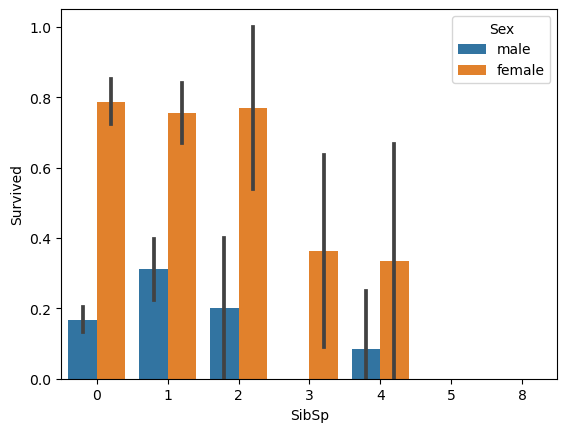

In [34]:
sns.barplot(x='SibSp',y='Survived',hue='Sex',data=titanic_df)

In [35]:
titanic_df.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

<Axes: xlabel='Parch', ylabel='Survived'>

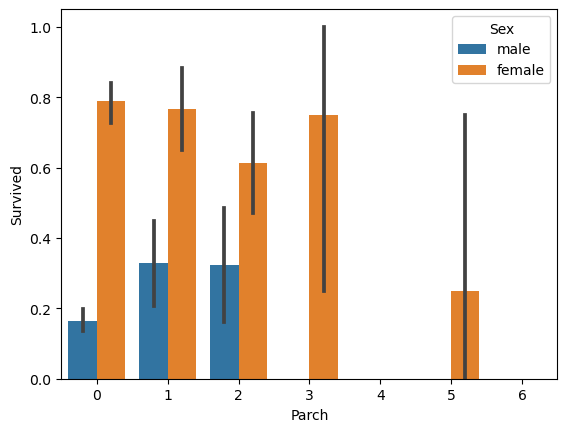

In [36]:
sns.barplot(x='Parch',y='Survived',hue='Sex',data=titanic_df)

In [37]:
titanic_df.groupby(['Fare','Survived'])['Survived'].count()

Fare      Survived
0.0000    0           14
          1            1
4.0125    0            1
5.0000    0            1
6.2375    0            1
                      ..
247.5208  1            1
262.3750  1            2
263.0000  0            2
          1            2
512.3292  1            3
Name: Survived, Length: 330, dtype: int64

In [38]:
titanic_df.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

<Axes: xlabel='Embarked', ylabel='Survived'>

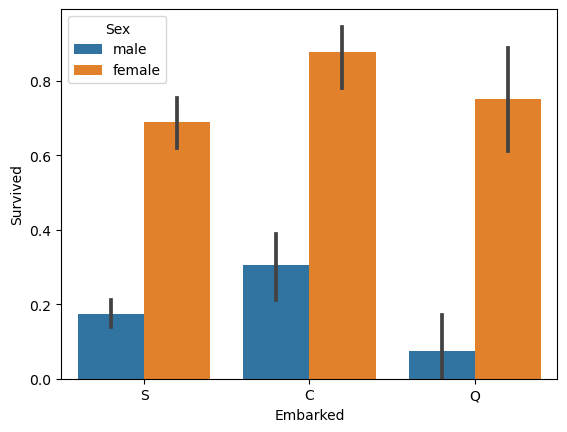

In [39]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=titanic_df)